<a href="https://colab.research.google.com/github/Alan-Cheong/IEEE_QW_2020/blob/master/Fermionic_Real_Estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Sample of Real Estate Fermion Field (3x3):

Grid (0,0):
  ↑ Mall (up) - $1,316,609
  ↓ Land (down) - $182,046

Grid (0,1):
  ↑ Office (up) - $1,776,052
  ↓ Retail (down) - $1,333,437

Grid (0,2):
  ↑ Hotel (up) - $1,942,456
  ↓ Retail (down) - $253,930

Grid (1,0):
  ↑ Apartment (up) - $354,871
  ↓ Office (down) - $2,434,430

Grid (1,1):
  ↑ Retail (up) - $1,537,818
  ↓ Retail (down) - $1,333,740

Grid (1,2):
  ↑ Land (up) - $2,924,603
  ↓ Office (down) - $297,122

Grid (2,0):
  ↑ Mall (up) - $1,647,626
  ↓ House (down) - $1,687,782

Grid (2,1):
  ↑ Factory (up) - $1,903,825
  ↓ Retail (down) - $1,522,800

Grid (2,2):
  ↑ Factory (up) - $1,877,116
  ↓ Office (down) - $1,067,774


Field Statistics:
Total Properties: 50
Occupied Properties: 50
Total Value: $64,429,989
Spin Up Properties: 25
Spin Down Properties: 25

Property Types Distribution:
  Mall: 7
  Land: 7
  Office: 7
  Retail: 7
  Hotel: 3
  Condo: 5
  Apartment: 3
  Warehouse: 4
  House: 4
  Factory: 3


Demonstrating Fermion 

<ipython-input-5-70b6fd48ffdd>:324: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


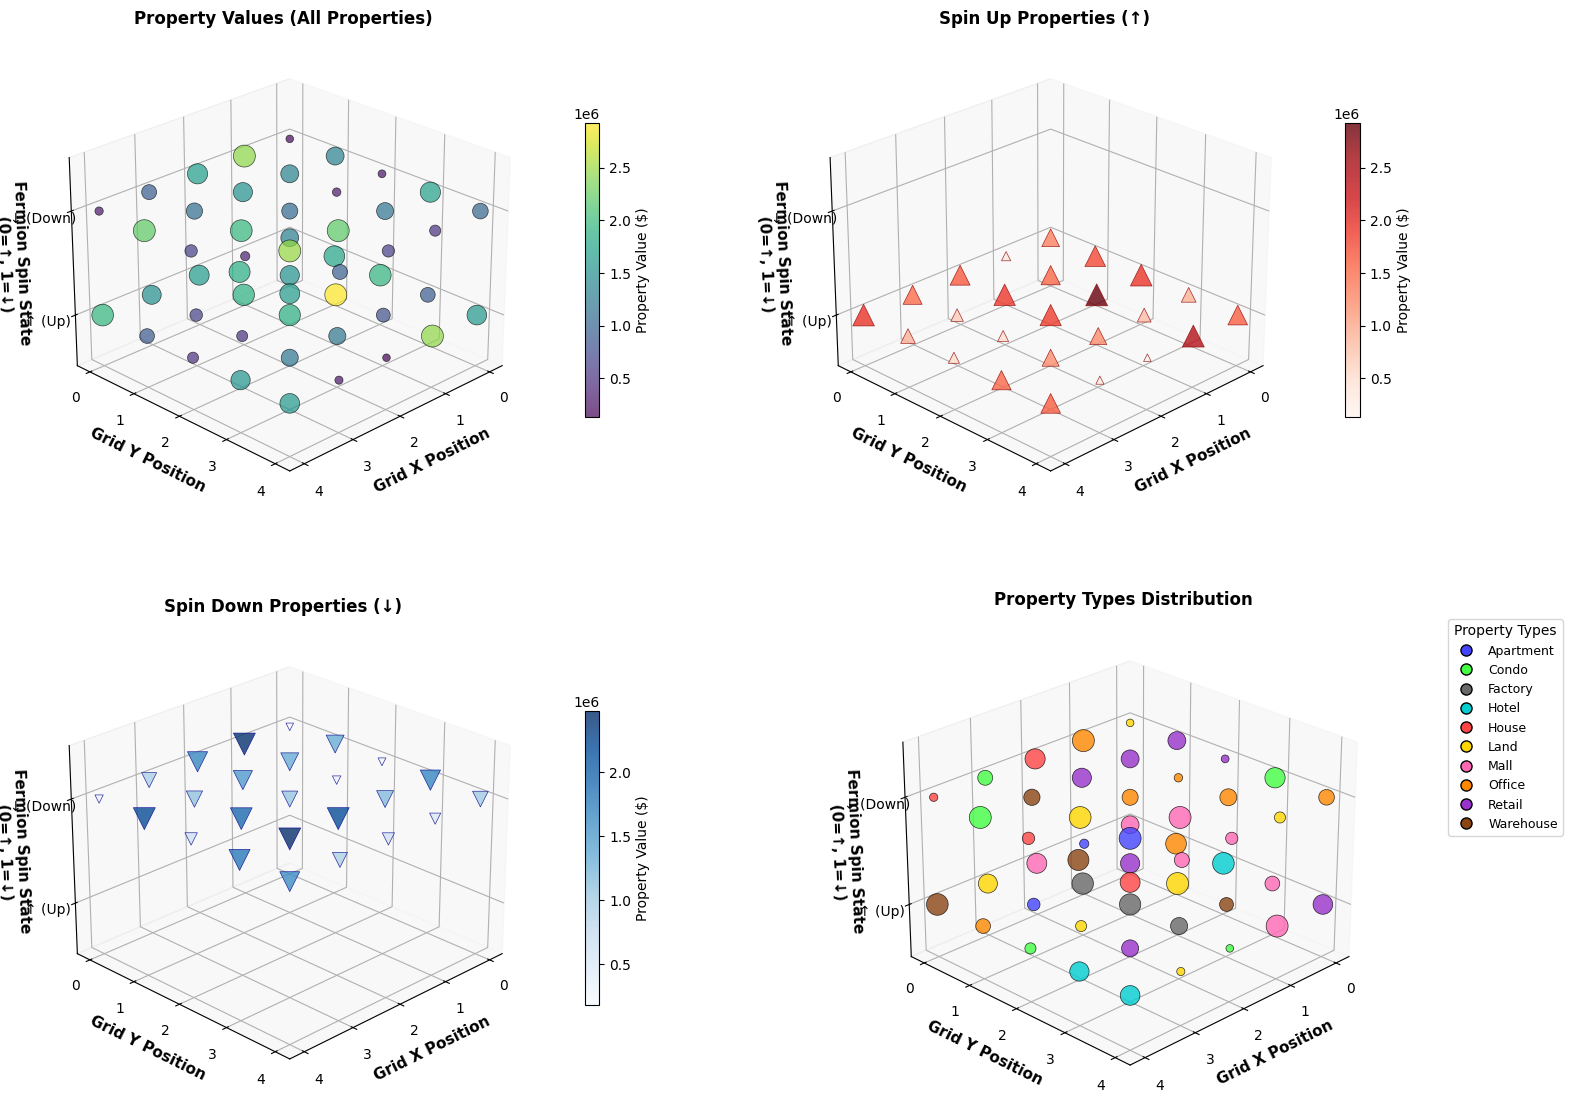

Showing interactive 3D view...


<ipython-input-5-70b6fd48ffdd>:457: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


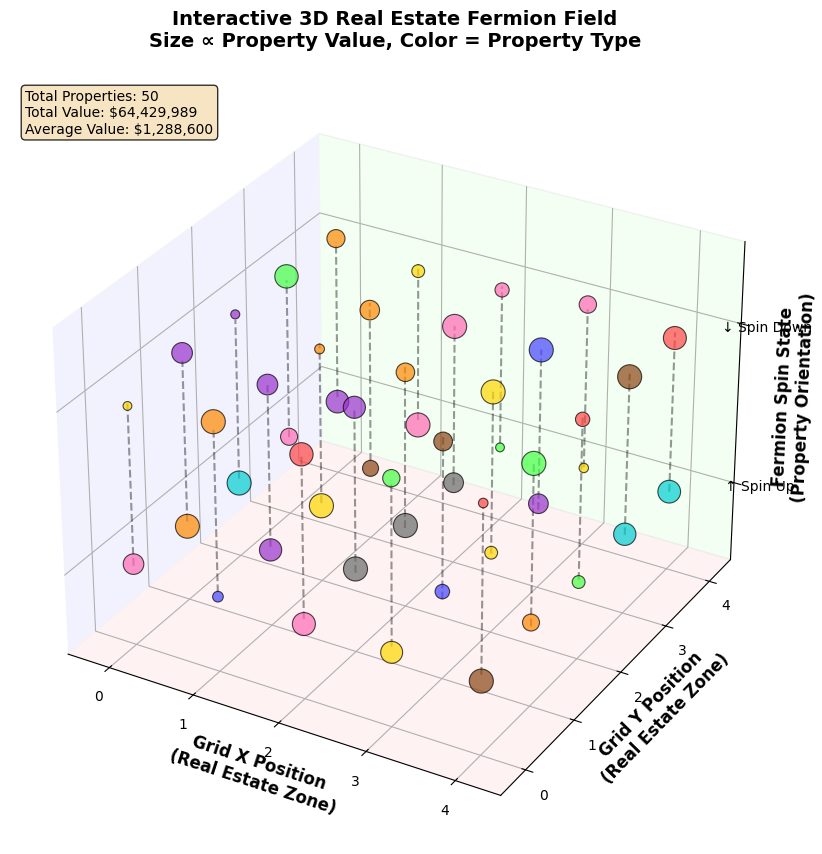

Creating animated field dynamics...


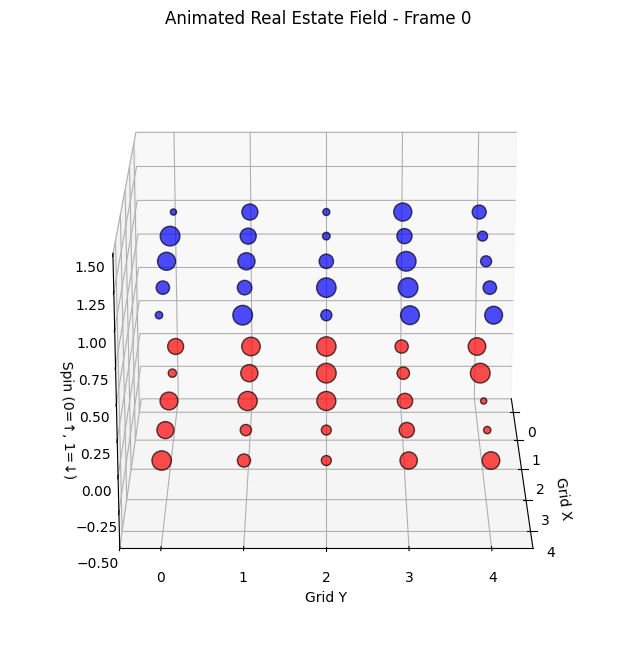

Annihilated: Hotel (up) - $1,605,775 at (4,4)
Annihilated: Factory (up) - $1,214,549 at (2,3)
Pauli exclusion: Cannot create property at (2,4) down - already occupied!
Pauli exclusion: Cannot create property at (0,3) up - already occupied!
Annihilated: Land (up) - $2,924,603 at (1,2)
Created: Land (up) - $2,924,603 at (1,2)

Final total field value: $61,609,665


In [5]:
import numpy as np
import random
from dataclasses import dataclass
from typing import List, Tuple, Optional
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

@dataclass
class RealEstate:
    """Represents a real estate property with quantum-like properties"""
    property_type: str
    value: float
    location: str
    spin_state: str  # "up" or "down" - analogous to fermion spin
    occupied: bool = True

    def __str__(self):
        return f"{self.property_type} ({self.spin_state}) - ${self.value:,.0f}"

class RealEstateFermionField:
    """A quantum field where fermions are replaced by real estate properties"""

    def __init__(self, grid_size: Tuple[int, int]):
        self.grid_size = grid_size
        self.field = np.empty(grid_size, dtype=object)
        self.property_types = [
            "House", "Apartment", "Condo", "Office", "Warehouse",
            "Retail", "Land", "Mall", "Hotel", "Factory"
        ]
        self.locations = [
            "Downtown", "Suburbs", "Waterfront", "Mountain", "Industrial",
            "Commercial", "Residential", "Historic", "Modern", "Rural"
        ]

        # Initialize the field
        self._initialize_field()

    def _initialize_field(self):
        """Initialize each grid cell with exactly two real estate properties"""
        for i in range(self.grid_size[0]):
            for j in range(self.grid_size[1]):
                # Create two properties per cell (like spin-up and spin-down fermions)
                property_up = self._create_random_property("up")
                property_down = self._create_random_property("down")

                # Store as a tuple (spin-up, spin-down)
                self.field[i, j] = (property_up, property_down)

    def _create_random_property(self, spin_state: str) -> RealEstate:
        """Create a random real estate property with given spin state"""
        property_type = random.choice(self.property_types)
        location = random.choice(self.locations)

        # Value depends on property type and location
        base_value = random.uniform(100000, 2000000)
        if location in ["Downtown", "Waterfront"]:
            base_value *= 1.5
        if property_type in ["Office", "Mall", "Hotel"]:
            base_value *= 1.3

        return RealEstate(
            property_type=property_type,
            value=base_value,
            location=location,
            spin_state=spin_state,
            occupied=True
        )

    def get_property(self, i: int, j: int, spin: str) -> Optional[RealEstate]:
        """Get a specific property from the field"""
        if 0 <= i < self.grid_size[0] and 0 <= j < self.grid_size[1]:
            properties = self.field[i, j]
            if spin == "up":
                return properties[0]
            elif spin == "down":
                return properties[1]
        return None

    def set_property(self, i: int, j: int, spin: str, new_property: RealEstate):
        """Replace a property in the field (like annihilation/creation operators)"""
        if 0 <= i < self.grid_size[0] and 0 <= j < self.grid_size[1]:
            properties = list(self.field[i, j])
            if spin == "up":
                properties[0] = new_property
            elif spin == "down":
                properties[1] = new_property
            self.field[i, j] = tuple(properties)

    def annihilate_property(self, i: int, j: int, spin: str):
        """Remove a property (fermion annihilation operator)"""
        current_property = self.get_property(i, j, spin)
        if current_property and current_property.occupied:
            current_property.occupied = False
            print(f"Annihilated: {current_property} at ({i},{j})")

    def create_property(self, i: int, j: int, spin: str):
        """Create a new property (fermion creation operator)"""
        current_property = self.get_property(i, j, spin)
        if current_property and not current_property.occupied:
            current_property.occupied = True
            print(f"Created: {current_property} at ({i},{j})")
        elif current_property and current_property.occupied:
            print(f"Pauli exclusion: Cannot create property at ({i},{j}) {spin} - already occupied!")

    def calculate_total_value(self) -> float:
        """Calculate total value of all properties in the field"""
        total_value = 0
        for i in range(self.grid_size[0]):
            for j in range(self.grid_size[1]):
                properties = self.field[i, j]
                for prop in properties:
                    if prop.occupied:
                        total_value += prop.value
        return total_value

    def get_field_statistics(self) -> dict:
        """Get statistics about the real estate field"""
        stats = {
            'total_properties': 0,
            'occupied_properties': 0,
            'total_value': 0,
            'property_types': {},
            'spin_up_count': 0,
            'spin_down_count': 0
        }

        for i in range(self.grid_size[0]):
            for j in range(self.grid_size[1]):
                properties = self.field[i, j]
                for prop in properties:
                    stats['total_properties'] += 1
                    if prop.occupied:
                        stats['occupied_properties'] += 1
                        stats['total_value'] += prop.value

                        # Count property types
                        if prop.property_type not in stats['property_types']:
                            stats['property_types'][prop.property_type] = 0
                        stats['property_types'][prop.property_type] += 1

                        # Count spins
                        if prop.spin_state == "up":
                            stats['spin_up_count'] += 1
                        else:
                            stats['spin_down_count'] += 1

        return stats

    def visualize_field(self):
        """Create a 2D visualization of the real estate field"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Value heatmap
        value_grid = np.zeros(self.grid_size)
        for i in range(self.grid_size[0]):
            for j in range(self.grid_size[1]):
                properties = self.field[i, j]
                cell_value = sum(prop.value for prop in properties if prop.occupied)
                value_grid[i, j] = cell_value

        im1 = ax1.imshow(value_grid, cmap='viridis', aspect='auto')
        ax1.set_title('Total Property Value per Grid Cell')
        ax1.set_xlabel('Grid X')
        ax1.set_ylabel('Grid Y')
        plt.colorbar(im1, ax=ax1, label='Value ($)')

        # Occupancy visualization
        occupancy_grid = np.zeros(self.grid_size)
        for i in range(self.grid_size[0]):
            for j in range(self.grid_size[1]):
                properties = self.field[i, j]
                occupied_count = sum(1 for prop in properties if prop.occupied)
                occupancy_grid[i, j] = occupied_count

        im2 = ax2.imshow(occupancy_grid, cmap='RdYlBu', vmin=0, vmax=2, aspect='auto')
        ax2.set_title('Property Occupancy per Grid Cell')
        ax2.set_xlabel('Grid X')
        ax2.set_ylabel('Grid Y')
        plt.colorbar(im2, ax=ax2, label='Occupied Properties')

        plt.tight_layout()
        plt.show()

    def visualize_field_3d(self, show_values=True, show_spin_states=True):
        """Create a 3D visualization of the real estate field"""
        fig = plt.figure(figsize=(18, 14))

        if show_values and show_spin_states:
            # Create subplots for different views
            ax1 = fig.add_subplot(221, projection='3d')
            ax2 = fig.add_subplot(222, projection='3d')
            ax3 = fig.add_subplot(223, projection='3d')
            ax4 = fig.add_subplot(224, projection='3d')
            axes = [ax1, ax2, ax3, ax4]
            titles = ['Property Values (All)', 'Spin Up Properties', 'Spin Down Properties', 'Property Types Distribution']
        else:
            ax = fig.add_subplot(111, projection='3d')
            axes = [ax]
            titles = ['3D Real Estate Field']

        # Define consistent color scheme for property types
        type_colors = {
            'House': '#FF4444',      # Red
            'Apartment': '#4444FF',  # Blue
            'Condo': '#44FF44',      # Green
            'Office': '#FF8800',     # Orange
            'Warehouse': '#8B4513',  # Brown
            'Retail': '#9932CC',     # Purple
            'Land': '#FFD700',       # Gold
            'Mall': '#FF69B4',       # Hot Pink
            'Hotel': '#00CED1',      # Cyan
            'Factory': '#696969'     # Gray
        }

        # Prepare data for plotting
        x_coords, y_coords, z_coords = [], [], []
        values, colors, sizes, prop_types = [], [], [], []

        for i in range(self.grid_size[0]):
            for j in range(self.grid_size[1]):
                properties = self.field[i, j]

                for k, prop in enumerate(properties):
                    if prop.occupied:
                        x_coords.append(i)
                        y_coords.append(j)
                        z_coords.append(k)  # k=0 for spin-up, k=1 for spin-down
                        values.append(prop.value)
                        colors.append(type_colors.get(prop.property_type, '#000000'))
                        prop_types.append(prop.property_type)

                        # Size based on value (normalized)
                        sizes.append(max(30, min(250, prop.value / 8000)))

        # Plot 1: All properties with values
        if len(axes) > 1:
            scatter1 = axes[0].scatter(x_coords, y_coords, z_coords,
                                     c=values, s=sizes, alpha=0.7, cmap='viridis', edgecolors='black', linewidth=0.5)
            axes[0].set_title('Property Values (All Properties)', fontsize=12, fontweight='bold')
            cbar1 = plt.colorbar(scatter1, ax=axes[0], shrink=0.6, pad=0.1)
            cbar1.set_label('Property Value ($)', fontsize=10)

            # Plot 2: Spin up properties only
            x_up = [x for i, x in enumerate(x_coords) if z_coords[i] == 0]
            y_up = [y for i, y in enumerate(y_coords) if z_coords[i] == 0]
            z_up = [z for z in z_coords if z == 0]
            val_up = [v for i, v in enumerate(values) if z_coords[i] == 0]
            size_up = [s for i, s in enumerate(sizes) if z_coords[i] == 0]

            if x_up:
                scatter2 = axes[1].scatter(x_up, y_up, z_up, c=val_up, s=size_up,
                                        alpha=0.8, cmap='Reds', marker='^', edgecolors='darkred', linewidth=0.5)
                axes[1].set_title('Spin Up Properties (↑)', fontsize=12, fontweight='bold')
                cbar2 = plt.colorbar(scatter2, ax=axes[1], shrink=0.6, pad=0.1)
                cbar2.set_label('Property Value ($)', fontsize=10)

            # Plot 3: Spin down properties only
            x_down = [x for i, x in enumerate(x_coords) if z_coords[i] == 1]
            y_down = [y for i, y in enumerate(y_coords) if z_coords[i] == 1]
            z_down = [z for z in z_coords if z == 1]
            val_down = [v for i, v in enumerate(values) if z_coords[i] == 1]
            size_down = [s for i, s in enumerate(sizes) if z_coords[i] == 1]

            if x_down:
                scatter3 = axes[2].scatter(x_down, y_down, z_down, c=val_down, s=size_down,
                                        alpha=0.8, cmap='Blues', marker='v', edgecolors='darkblue', linewidth=0.5)
                axes[2].set_title('Spin Down Properties (↓)', fontsize=12, fontweight='bold')
                cbar3 = plt.colorbar(scatter3, ax=axes[2], shrink=0.6, pad=0.1)
                cbar3.set_label('Property Value ($)', fontsize=10)

            # Plot 4: Property types with clear legend
            scatter4 = axes[3].scatter(x_coords, y_coords, z_coords,
                                     c=colors, s=sizes, alpha=0.8, edgecolors='black', linewidth=0.5)
            axes[3].set_title('Property Types Distribution', fontsize=12, fontweight='bold')

            # Create comprehensive legend for property types
            unique_types = list(set(prop_types))
            legend_elements = []
            for prop_type in sorted(unique_types):
                legend_elements.append(
                    plt.Line2D([0], [0], marker='o', color='w',
                             markerfacecolor=type_colors.get(prop_type, '#000000'),
                             markersize=8, label=prop_type, markeredgecolor='black')
                )

            # Add legend outside the plot area
            axes[3].legend(handles=legend_elements, bbox_to_anchor=(1.15, 1),
                          loc='upper left', fontsize=9, title='Property Types', title_fontsize=10)

        else:
            # Single plot version
            scatter = axes[0].scatter(x_coords, y_coords, z_coords,
                                    c=values, s=sizes, alpha=0.7, cmap='viridis')
            axes[0].set_title('3D Real Estate Fermion Field')
            plt.colorbar(scatter, ax=axes[0], shrink=0.5, label='Value ($)')

        # Set labels and formatting for all axes
        for i, ax in enumerate(axes):
            ax.set_xlabel('Grid X Position', fontsize=11, fontweight='bold')
            ax.set_ylabel('Grid Y Position', fontsize=11, fontweight='bold')
            ax.set_zlabel('Fermion Spin State\n(0=↑, 1=↓)', fontsize=11, fontweight='bold')
            ax.set_zlim(-0.5, 1.5)

            # Set integer ticks for grid positions
            ax.set_xticks(range(self.grid_size[0]))
            ax.set_yticks(range(self.grid_size[1]))
            ax.set_zticks([0, 1])
            ax.set_zticklabels(['↑ (Up)', '↓ (Down)'])

            # Add grid lines
            ax.grid(True, alpha=0.3)

            # Set viewing angle for better perspective
            ax.view_init(elev=25, azim=45)

            # Add subtle background color
            ax.xaxis.pane.fill = True
            ax.yaxis.pane.fill = True
            ax.zaxis.pane.fill = True
            ax.xaxis.pane.set_facecolor((0.95, 0.95, 0.95, 0.5))
            ax.yaxis.pane.set_facecolor((0.95, 0.95, 0.95, 0.5))
            ax.zaxis.pane.set_facecolor((0.95, 0.95, 0.95, 0.5))

        plt.tight_layout()
        plt.show()

    def visualize_field_3d_interactive(self):
        """Create an interactive 3D visualization with enhanced legend and labels"""
        fig = plt.figure(figsize=(15, 10))
        ax = fig.add_subplot(111, projection='3d')

        # Define consistent color scheme for property types
        type_colors = {
            'House': '#FF4444',      # Red
            'Apartment': '#4444FF',  # Blue
            'Condo': '#44FF44',      # Green
            'Office': '#FF8800',     # Orange
            'Warehouse': '#8B4513',  # Brown
            'Retail': '#9932CC',     # Purple
            'Land': '#FFD700',       # Gold
            'Mall': '#FF69B4',       # Hot Pink
            'Hotel': '#00CED1',      # Cyan
            'Factory': '#696969'     # Gray
        }

        # Prepare data
        x_coords, y_coords, z_coords = [], [], []
        values, colors, sizes, prop_types = [], [], [], []
        spin_states = []

        for i in range(self.grid_size[0]):
            for j in range(self.grid_size[1]):
                properties = self.field[i, j]

                for k, prop in enumerate(properties):
                    if prop.occupied:
                        x_coords.append(i)
                        y_coords.append(j)
                        z_coords.append(k + random.uniform(-0.05, 0.05))  # Slight jitter for visibility
                        values.append(prop.value)
                        prop_types.append(prop.property_type)
                        spin_states.append(prop.spin_state)

                        # Color based on property type
                        colors.append(type_colors.get(prop.property_type, '#000000'))

                        # Size based on value
                        sizes.append(max(40, min(300, prop.value / 6000)))

        # Create the scatter plot
        scatter = ax.scatter(x_coords, y_coords, z_coords,
                           c=colors, s=sizes, alpha=0.7, edgecolors='black', linewidth=0.8)

        # Enhanced axis labels and formatting
        ax.set_xlabel('Grid X Position\n(Real Estate Zone)', fontsize=12, fontweight='bold')
        ax.set_ylabel('Grid Y Position\n(Real Estate Zone)', fontsize=12, fontweight='bold')
        ax.set_zlabel('Fermion Spin State\n(Property Orientation)', fontsize=12, fontweight='bold')
        ax.set_title('Interactive 3D Real Estate Fermion Field\nSize ∝ Property Value, Color = Property Type',
                    fontsize=14, fontweight='bold', pad=20)

        # Add connection lines between spin pairs
        connection_count = 0
        for i in range(self.grid_size[0]):
            for j in range(self.grid_size[1]):
                properties = self.field[i, j]
                if all(prop.occupied for prop in properties):
                    # Draw line connecting spin-up and spin-down properties
                    ax.plot([i, i], [j, j], [0, 1], 'k--', alpha=0.4, linewidth=1.5)
                    connection_count += 1

        # Set limits and grid with better formatting
        ax.set_xlim(-0.5, self.grid_size[0] - 0.5)
        ax.set_ylim(-0.5, self.grid_size[1] - 0.5)
        ax.set_zlim(-0.5, 1.5)

        # Set integer ticks
        ax.set_xticks(range(self.grid_size[0]))
        ax.set_yticks(range(self.grid_size[1]))
        ax.set_zticks([0, 1])
        ax.set_zticklabels(['↑ Spin Up', '↓ Spin Down'])

        ax.grid(True, alpha=0.3)

        # Create comprehensive legends
        # Legend 1: Property Types
        unique_types = list(set(prop_types))
        property_legend_elements = []
        for prop_type in sorted(unique_types):
            property_legend_elements.append(
                plt.Line2D([0], [0], marker='o', color='w',
                         markerfacecolor=type_colors.get(prop_type, '#000000'),
                         markersize=10, label=prop_type, markeredgecolor='black', markeredgewidth=1)
            )

        # Legend 2: Spin States and Connections
        system_legend_elements = [
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray',
                      markersize=12, label=f'Properties (Size ∝ Value)', alpha=0.7, markeredgecolor='black'),
            plt.Line2D([0], [0], linestyle='--', color='black',
                      label=f'Fermion Pair Connections ({connection_count})', alpha=0.6, linewidth=2),
            plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='lightblue',
                      markersize=8, label='Z=0: Spin Up (↑)', alpha=0.7),
            plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='lightcoral',
                      markersize=8, label='Z=1: Spin Down (↓)', alpha=0.7)
        ]

        # Position legends
        legend1 = ax.legend(handles=property_legend_elements,
                           bbox_to_anchor=(1.15, 1), loc='upper left',
                           fontsize=9, title='Property Types', title_fontsize=11,
                           framealpha=0.9, fancybox=True)

        legend2 = ax.legend(handles=system_legend_elements,
                           bbox_to_anchor=(1.15, 0.6), loc='upper left',
                           fontsize=9, title='Field Structure', title_fontsize=11,
                           framealpha=0.9, fancybox=True)

        # Add both legends to the plot
        ax.add_artist(legend1)
        ax.add_artist(legend2)

        # Enhanced pane styling
        ax.xaxis.pane.fill = True
        ax.yaxis.pane.fill = True
        ax.zaxis.pane.fill = True
        ax.xaxis.pane.set_facecolor((0.9, 0.9, 1.0, 0.3))
        ax.yaxis.pane.set_facecolor((0.9, 1.0, 0.9, 0.3))
        ax.zaxis.pane.set_facecolor((1.0, 0.9, 0.9, 0.3))

        # Add statistical information as text
        total_value = sum(values)
        avg_value = total_value / len(values) if values else 0
        info_text = f'Total Properties: {len(values)}\nTotal Value: ${total_value:,.0f}\nAverage Value: ${avg_value:,.0f}'
        ax.text2D(0.02, 0.98, info_text, transform=ax.transAxes, fontsize=10,
                 verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

        plt.tight_layout()
        plt.show()

    def create_field_animation(self, frames=50):
        """Create an animated 3D visualization showing field dynamics"""
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        def animate_frame(frame):
            ax.clear()

            # Simulate some dynamics by randomly changing occupancy
            if frame > 0:
                # Randomly annihilate/create some properties
                for _ in range(2):
                    i, j = random.randint(0, self.grid_size[0]-1), random.randint(0, self.grid_size[1]-1)
                    spin = random.choice(["up", "down"])
                    if random.random() > 0.5:
                        self.annihilate_property(i, j, spin)
                    else:
                        self.create_property(i, j, spin)

            # Plot current state
            x_coords, y_coords, z_coords = [], [], []
            colors, sizes = [], []

            for i in range(self.grid_size[0]):
                for j in range(self.grid_size[1]):
                    properties = self.field[i, j]

                    for k, prop in enumerate(properties):
                        if prop.occupied:
                            x_coords.append(i)
                            y_coords.append(j)
                            z_coords.append(k)

                            colors.append('red' if prop.spin_state == "up" else 'blue')
                            sizes.append(max(20, min(200, prop.value / 10000)))

            if x_coords:  # Only plot if there are occupied properties
                ax.scatter(x_coords, y_coords, z_coords,
                         c=colors, s=sizes, alpha=0.7, edgecolors='black')

            ax.set_xlabel('Grid X')
            ax.set_ylabel('Grid Y')
            ax.set_zlabel('Spin (0=↑, 1=↓)')
            ax.set_title(f'Animated Real Estate Field - Frame {frame}')
            ax.set_xlim(-0.5, self.grid_size[0] - 0.5)
            ax.set_ylim(-0.5, self.grid_size[1] - 0.5)
            ax.set_zlim(-0.5, 1.5)
            ax.view_init(elev=20, azim=frame * 2)  # Rotate view

        # Note: In a full environment, you would use FuncAnimation here
        # For now, we'll just show a few static frames
        for frame in [0, 10, 20, 30]:
            animate_frame(frame)
            plt.pause(0.1)

        plt.show()

    def print_field_sample(self, rows: int = 3, cols: int = 3):
        """Print a sample of the field contents"""
        print(f"\nSample of Real Estate Fermion Field ({rows}x{cols}):")
        print("=" * 80)

        for i in range(min(rows, self.grid_size[0])):
            for j in range(min(cols, self.grid_size[1])):
                properties = self.field[i, j]
                print(f"\nGrid ({i},{j}):")
                print(f"  ↑ {properties[0]}")
                print(f"  ↓ {properties[1]}")

# Example usage and demonstration
if __name__ == "__main__":
    # Create a 5x5 real estate fermion field
    field = RealEstateFermionField((5, 5))

    # Print a sample of the field
    field.print_field_sample(3, 3)

    # Get field statistics
    stats = field.get_field_statistics()
    print(f"\n\nField Statistics:")
    print(f"Total Properties: {stats['total_properties']}")
    print(f"Occupied Properties: {stats['occupied_properties']}")
    print(f"Total Value: ${stats['total_value']:,.0f}")
    print(f"Spin Up Properties: {stats['spin_up_count']}")
    print(f"Spin Down Properties: {stats['spin_down_count']}")

    print(f"\nProperty Types Distribution:")
    for prop_type, count in stats['property_types'].items():
        print(f"  {prop_type}: {count}")

    # Demonstrate fermion operators
    print(f"\n\nDemonstrating Fermion Operations:")
    print("-" * 40)

    # Try to create a property where one already exists (Pauli exclusion)
    field.create_property(0, 0, "up")

    # Annihilate a property
    field.annihilate_property(0, 0, "up")

    # Now create a property in the empty spot
    field.create_property(0, 0, "up")

    # Visualize the field in 2D (uncomment to show plots)
    # field.visualize_field()

    # Visualize the field in 3D
    print(f"\nGenerating 3D visualizations...")
    field.visualize_field_3d()

    # Show interactive 3D view
    print(f"Showing interactive 3D view...")
    field.visualize_field_3d_interactive()

    # Demonstrate field dynamics with animation
    print(f"Creating animated field dynamics...")
    field.create_field_animation()

    print(f"\nFinal total field value: ${field.calculate_total_value():,.0f}")